In [13]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def extract_data(sectors):
    html_content = requests.get(sectors).text
    soup = BeautifulSoup(html_content, "html") 
    find_table = soup.find('table', class_='wikitable sortable')
    j = 0
    full_val = []
    for link in find_table.find_all('tr'):
        j += 1
        if(j == 1):
            continue
        i = 0
        d = {}
        for ele in link.find_all('td'):
            i += 1
            if(i == 1):
                st = ele.text
                st = st[:-1]
                d['symbol'] = st
            elif(i == 4):
                d['gics_sector'] = ele.text
        
        full_val.append(d)
    df = pd.DataFrame(full_val)
    # print(df)
    df1 = pd.DataFrame()
    df1["Company"] = df["symbol"]
    df1["GICS_Sector"] = df['gics_sector']
    df1.to_csv("GICS_Sectors.csv", index=False)
    return full_val


In [15]:
def daily_graph(val):
    top_data = pd.read_csv("week_top_dict.csv")
    bottom_data = pd.read_csv("week_bottom_dict.csv")
    gicssectors = pd.read_csv("GICS_Sectors.csv")
    week_topdata = pd.merge(top_data,gicssectors,on="Company")
    week_bottomdata = pd.merge(bottom_data,gicssectors,on="Company")
    week_topdata_mean = week_topdata.groupby('GICS_Sector').mean().reset_index()
    week_bottomdata_mean = week_bottomdata.groupby('GICS_Sector').mean().reset_index()
    top_dict = week_topdata_mean.to_dict()
    top_dict1 = {}
    listt = list(top_dict.values())
    for i in range(9):
        top_dict1[listt[0][i]] = listt[1][i]
    bottom_dict = week_bottomdata_mean.to_dict()
    bottom_dict1 = {}
    listt1 = list(bottom_dict.values())
    for i in range(10):
        bottom_dict1[listt1[0][i]] = listt1[1][i]
    return top_dict1,bottom_dict1


In [16]:
def bar_graph(dp_top,dp_bottom):
    dp_top = dict(sorted(dp_top.items(), key=lambda item: item[1],reverse=True)[:10])
    dp_bottom = dict(sorted(dp_bottom.items(), key=lambda item: item[1],reverse=True)[:10])

    dp_new = []
    top_new = []
    bottom_new = []
    for i in dp_top:
        if(i in dp_bottom):
            top_new.append(dp_top[i])
            bottom_new.append(dp_bottom[i])
            dp_new.append(i)

    data = []
    data.append(top_new)
    data.append(bottom_new)

    barWidth = 0.25
    fig = plt.subplots(figsize=(25,9))
    br1 = np.arange(len(top_new))
    br2 = [x + barWidth for x in br1]

    plt.bar(br1, top_new, color ='r', width = barWidth, 
        edgecolor ='grey', label ='Top 25 companies') 
    plt.bar(br2, bottom_new, color ='b', width = barWidth, 
        edgecolor ='grey', label ='Bottom 25 companies') 
    plt.legend(labels=['Top 25', 'Bottom 25'])
    plt.xlabel('Sectors', fontweight ='bold') 
    plt.ylabel('Average', fontweight ='bold')
    plt.xticks([r + barWidth for r in range(len(top_new))], 
    dp_new) 

    plt.show()


In [17]:
def function(sectors):
    val = extract_data(sectors)
    dp_top, dp_bottom = daily_graph(val)
    bar_graph(dp_top,dp_bottom)


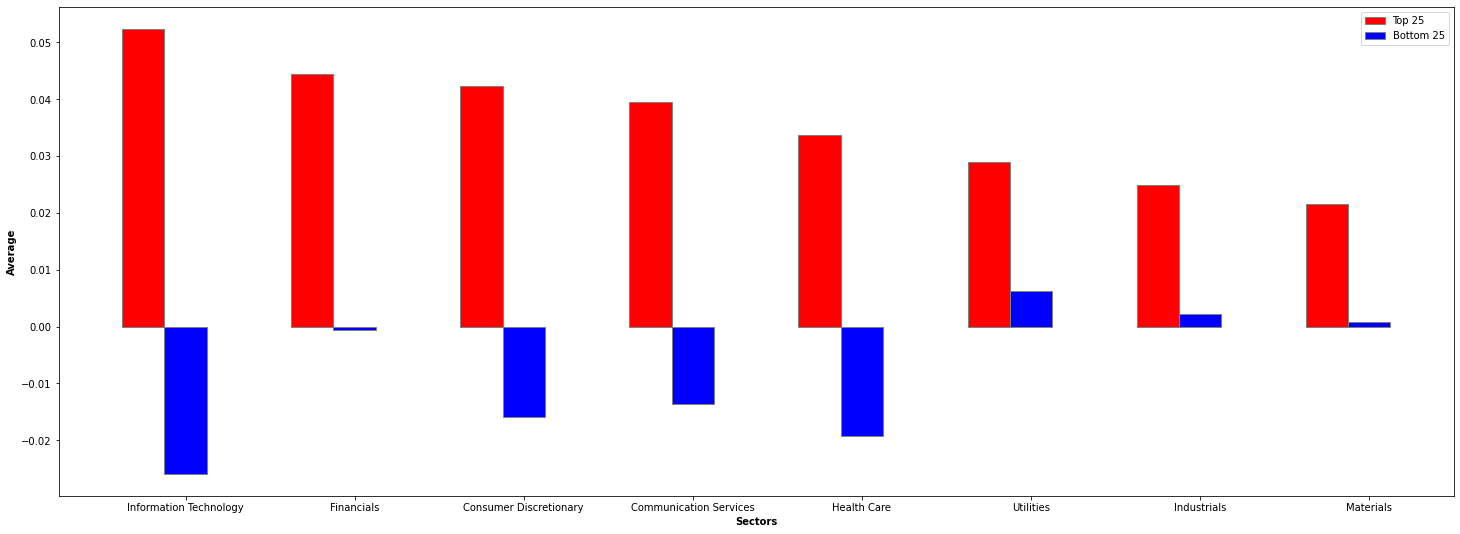

In [18]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
function(url)